##Emotions

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv("/content/text.csv")

In [25]:
# Check null
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [26]:
# Check data types
df.dtypes

Unnamed: 0     int64
text          object
label          int64
dtype: object

In [27]:
# Drop unnesessary data
df = df.drop(columns=["Unnamed: 0"], axis=0)

In [28]:
df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [29]:
#sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)
labels = ["sadness", "joy", "love", "anger", "fear", "suprise"]

In [30]:
data = [c for c in df["label"].value_counts()]

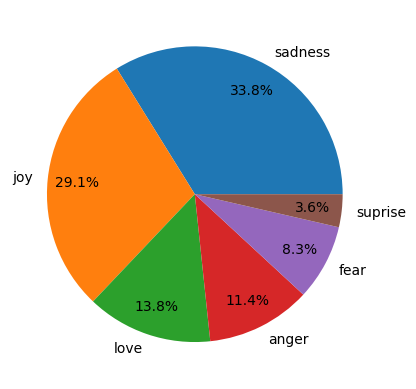

In [31]:
plt.pie(data, labels=labels, autopct='%1.1f%%',
       pctdistance=0.8, labeldistance=1.1)
plt.show()

In [32]:
# Split data into train 0.8 and test 0.2
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"])

In [33]:
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)
print("y_train shape = ", y_train.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (312606,)
X_test shape =  (104203,)
y_train shape =  (312606,)
y_test shape =  (104203,)


In [34]:
#Initialize CountVectorizer and vectorize text
vectorizer = CountVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Init MultinomialNB model
MNB_classifier = MultinomialNB()

In [38]:
# Fit data
MNB_classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [39]:
# Score and classification report
y_pred = MNB_classifier.predict(X_test_vect)

In [40]:
accuracy_mnb = accuracy_score(y_test, y_pred)
print("Accuracy MultinomialNB: ", accuracy_mnb)

Accuracy MultinomialNB:  0.8595146013070641


In [41]:
classification_mnb = classification_report(y_test, y_pred)
print('Classification report MultinomialNB:')
print(classification_mnb)

Classification report MultinomialNB:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     30330
           1       0.85      0.93      0.89     35447
           2       0.82      0.61      0.70      8697
           3       0.90      0.84      0.87     14285
           4       0.84      0.80      0.82     11754
           5       0.86      0.36      0.50      3690

    accuracy                           0.86    104203
   macro avg       0.86      0.75      0.78    104203
weighted avg       0.86      0.86      0.85    104203



sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [42]:
MNB_classifier.predict(vectorizer.transform(["im afraid to be alone"]))

array([4])

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.svm import SVC

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# LogisticRegression

In [47]:
LRC = LogisticRegression()

In [48]:
LRC.fit(X_train_vect, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred_logreg = LRC.predict(X_test_vect)

In [50]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy Logistic Regression: ", accuracy_logreg)

Accuracy Logistic Regression:  0.8946863334069076


In [51]:
classification_logreg = classification_report(y_test, y_pred_logreg)
print('Classification report Logistic Regression:')
print(classification_logreg)

Classification report Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     30330
           1       0.92      0.92      0.92     35447
           2       0.77      0.78      0.78      8697
           3       0.90      0.90      0.90     14285
           4       0.85      0.84      0.84     11754
           5       0.71      0.74      0.72      3690

    accuracy                           0.89    104203
   macro avg       0.85      0.85      0.85    104203
weighted avg       0.89      0.89      0.89    104203



In [52]:
LRC.predict(vectorizer.transform(["im afraid to be alone"]))

array([4])

In [53]:
from sklearn.naive_bayes import  BernoulliNB

In [54]:
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train_vect, y_train)

BernoulliNB()

In [55]:
y_pred_bnb = bnb_classifier.predict(X_test_vect)

In [56]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("Accuracy BernoulliNB: ", accuracy_bnb)

Accuracy BernoulliNB:  0.8450044624434997


In [57]:
classification_bnb = classification_report(y_test, y_pred_bnb)
print('Classification report BernoulliNB:')
print(classification_bnb)

Classification report BernoulliNB:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     30330
           1       0.84      0.93      0.88     35447
           2       0.77      0.57      0.65      8697
           3       0.90      0.84      0.87     14285
           4       0.84      0.80      0.82     11754
           5       0.72      0.18      0.28      3690

    accuracy                           0.85    104203
   macro avg       0.82      0.71      0.73    104203
weighted avg       0.84      0.85      0.83    104203



In [58]:
print("Accuracy BernoulliNB: ", accuracy_bnb)
print("Accuracy Logistic Regression: ", accuracy_logreg)
print("Accuracy MultinomialNB: ", accuracy_mnb)

Accuracy BernoulliNB:  0.8450044624434997
Accuracy Logistic Regression:  0.8946863334069076
Accuracy MultinomialNB:  0.8595146013070641
